Title: Sample Project Start: Bay Area Bike Share Data
Slug: sample-project-msis-2629
Summary: 2018 summer MSIS 2629 sample bay area bike share data project
Date: 2018-06-24 17:00
Category: Teaching
PostType: Project
Tags: santa clara university
Keywords: sample project start msis 2629
Authors: Dan Friedman

### Thought Process


1. Construct hypotheses on questions I want answered about this dataset.
2. Understand the fields, values, and number of observations.
3. Clean only what's needed to answer one question.
4. Test your hypothesis by extracting metrics and visualizing results. Try prototyping simple visualizations in Pandas Plot.
5. Repeat steps 1-4 as many times as need to answer your questions
6. Incorporate a similar dataset for comparison to tell a more interesting story.
7. Improve upon your initial visualizations to include the additional dataset and/or tell a more interesting story. Ideally use a level of benchmarking and/or interaction in your visualizations.

### Hypotheses

Sorted from easiest to most difficult.

- What dataset?
- Regular vs subscription users
- Popularity of rides by day of week
- Busiest dock?
- Popularity of bike rides by hour of day
- Which routes are most popular?
- Average miles covered on weekdays versus weekend rides
- Any bicycles broken?


**New dataset**
- Trends with BART dataset? Usage of one type of rides versus the other

### Import Modules

In [20]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

### Read in Data

In [21]:
df = pd.read_csv('201805-fordgobike-trip-data.csv')

### Check Fields of Data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179125 entries, 0 to 179124
Data columns (total 16 columns):
duration_sec               179125 non-null int64
start_time                 179125 non-null object
end_time                   179125 non-null object
start_station_id           179125 non-null int64
start_station_name         179125 non-null object
start_station_latitude     179125 non-null float64
start_station_longitude    179125 non-null float64
end_station_id             179125 non-null int64
end_station_name           179125 non-null object
end_station_latitude       179125 non-null float64
end_station_longitude      179125 non-null float64
bike_id                    179125 non-null int64
user_type                  179125 non-null object
member_birth_year          167376 non-null float64
member_gender              167413 non-null object
bike_share_for_all_trip    179125 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 21.9+ MB


### Regular versus subscription users

How many people are riding one-time (maybe tourists) versus how many are subscription paying users?

Look at field `user_type`

In [23]:
df['user_type'].value_counts()

Subscriber    149886
Customer       29239
Name: user_type, dtype: int64

#### Insight 

**Far majority of rides come from subscribers**

### Examine Rides by Day of Week

Convert `start_time` to datetime type and create new column called `start_time_datetime`.

Documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

In [24]:
df['start_time_datetime'] = pd.to_datetime(df['start_time'])

Create a new column called `start_time_day_name` to show day name like Thursday or Friday.

Documentation: http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.dt.weekday_name.html

In [25]:
df['start_time_day_name'] = df['start_time_datetime'].dt.weekday_name

Check we only have 7 unique values.

Documentation: https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.Series.unique.html

In [26]:
df['start_time_day_name'].unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

Keep records of rides only before May 29th so we have the same number of occurrences for all days of the week. 

In [27]:
may_29_2018 = date(2018, 5, 29)

Let's filter by rides before May 29th and get the total count of rides on each day.

Documentation date filters: https://stackoverflow.com/a/41845355/1710454

Documentation groupby: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

Documentation size: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.GroupBy.size.html

In [28]:
df[df['start_time_datetime']<may_29_2018].groupby(by='start_time_day_name').size()

start_time_day_name
Friday       25512
Monday       23510
Saturday     15035
Sunday       13644
Thursday     27542
Tuesday      26528
Wednesday    26705
dtype: int64

Sort series values from least to greatest.

Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

In [29]:
df[df['start_time_datetime']<may_29_2018].groupby(by='start_time_day_name').size().sort_values()

start_time_day_name
Sunday       13644
Saturday     15035
Monday       23510
Friday       25512
Tuesday      26528
Wednesday    26705
Thursday     27542
dtype: int64

Create bar plot of count of rides by day of week.

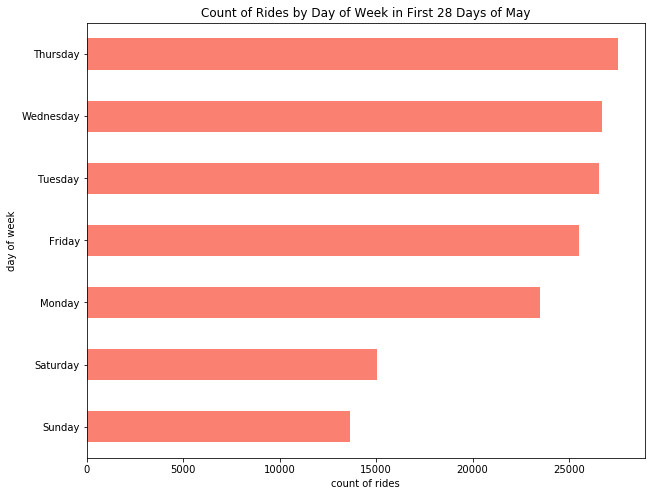

In [30]:
df[df['start_time_datetime']<may_29_2018].groupby(by='start_time_day_name').size().sort_values().plot(kind='barh', figsize=(10, 8), color='salmon')
plt.ylabel("day of week")
plt.xlabel("count of rides")
plt.title("Count of Rides by Day of Week in First 28 Days of May");

#### Insights 

**There's a fairly uniform spread of total rides from Monday-Friday, each with about 25000 rides.**

**There's a uniform spread of rides on Saturdays and Sundays too. Each day had roughly 14000 rides in May.**

### Busiest Dock

After each ride, bikes are docked at a station. I want to get a sense of the most popular stations bikes start at.

In [31]:
df.groupby('start_station_name').size().sort_values(ascending=False).head(10)

start_station_name
San Francisco Ferry Building (Harry Bridges Plaza)           3851
Montgomery St BART Station (Market St at 2nd St)             3523
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3510
The Embarcadero at Sansome St                                3255
Berry St at 4th St                                           3236
San Francisco Caltrain (Townsend St at 4th St)               3220
Market St at 10th St                                         3154
Powell St BART Station (Market St at 4th St)                 3122
Powell St BART Station (Market St at 5th St)                 2590
Steuart St at Market St                                      2575
dtype: int64

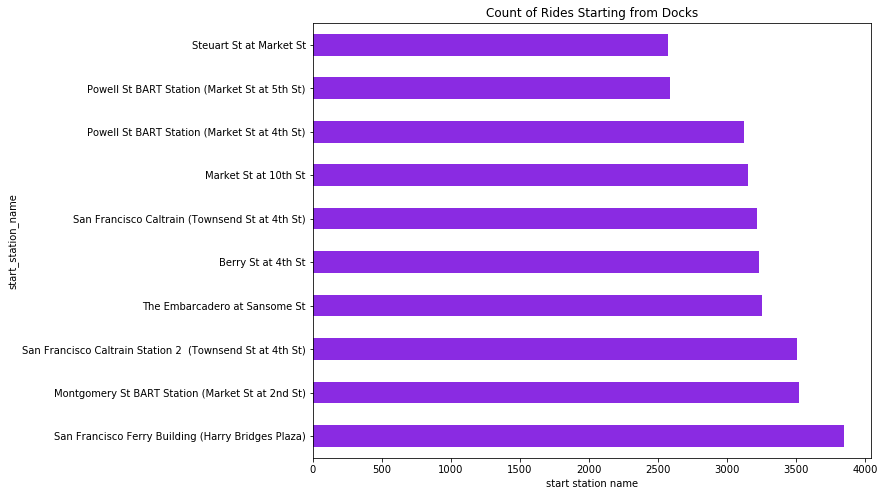

In [32]:
df.groupby('start_station_name').size().sort_values(ascending=False).head(10).plot(kind='barh', color='blueviolet', figsize=(10, 8))                                                                          
plt.xlabel("count of rides")
plt.xlabel("start station name")
plt.title("Count of Rides Starting from Docks");

#### Insights

**Most rides start from docks located in SoMa - often around BART, Caltrain or popular tourist destinations like the Ferry Building.**

### Bike Ride Popularity by Hour of Day

Extract the hour value of the datetime and cast it as new column called `start_time_hour`.

Documentation: http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.dt.hour.html

In [33]:
df['start_time_hour'] = df['start_time_datetime'].dt.hour

Verify there's 24 unique values in `start_time_hour` - should be 0 to 23.

In [34]:
df['start_time_hour'].unique()

array([21, 18, 14, 16, 23, 20, 22, 19, 17, 12, 11,  9,  8, 13, 15, 10,  7,
        6,  5,  4,  3,  2,  1,  0])

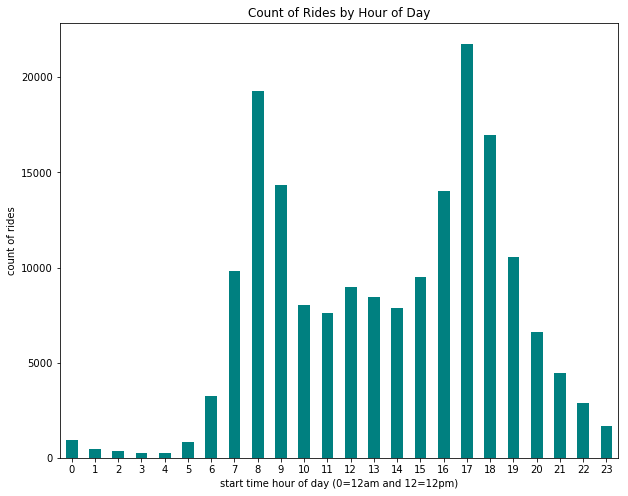

In [35]:
df.groupby('start_time_hour').size().plot(kind='bar', figsize=(10, 8), color='teal')
plt.ylabel("count of rides")
plt.xticks(rotation=0)
plt.xlabel("start time hour of day (0=12am and 12=12pm)")
plt.title("Count of Rides by Hour of Day");

#### Insights

**Most rides take place during standard work commute hours of 8am and 6pm. It's a bimodal distribution.**

### Next Steps

- Hone in the hypotheses to a more focused topic - perhaps around just subscribers versus one-time riders, activity of males versus females, rides by weekends versus weekdays, or something else.
- Incorporate additional dataset on ride patterns with BART data or open source weather data.
- Try utilizing more advanced/interesting visualizations to tell a story.